Install data set

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

# importing lib.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import random
from PIL import Image
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D ,Dense , Flatten

#loading data set

In [3]:
from datasets import load_dataset

ds = load_dataset("Pranavkpba2000/skin_cancer_small_dataset")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/653 [00:00<?, ?B/s]

(…)-00000-of-00001-2b84ce2361bc8c42.parquet:   0%|          | 0.00/66.4M [00:00<?, ?B/s]

(…)-00000-of-00001-3a9b253c406a4af7.parquet:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/11360 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2840 [00:00<?, ? examples/s]

In [4]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 11360
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 2840
    })
})

data set information

In [ ]:
img_count = len(list(ds['test']['image'])) # counting test rows
print(img_count)

2840


In [ ]:
img_count = len(list(ds['train']['image'])) # counting test rows
print(img_count)

11360


# overview of data set

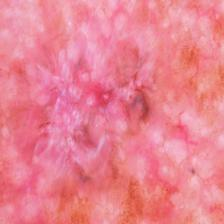

In [ ]:
img=ds['train']['image'][0]
img

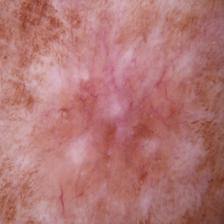

In [ ]:
img=ds['test']['image'][0]
img

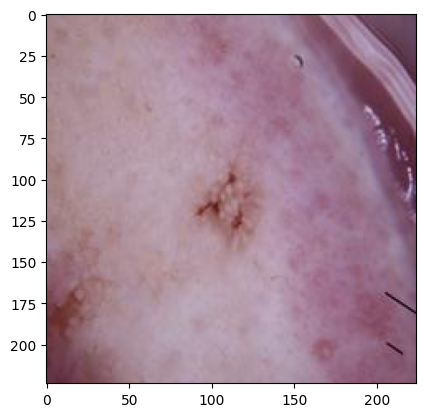

In [ ]:
plt.imshow(ds["train"]["image"][1])

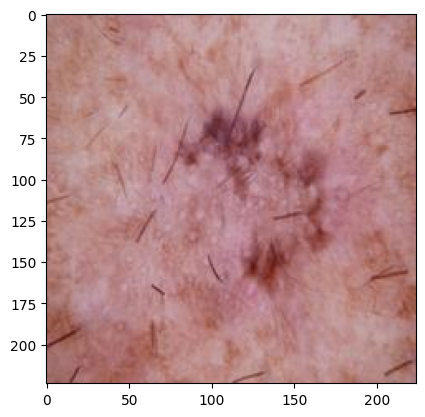

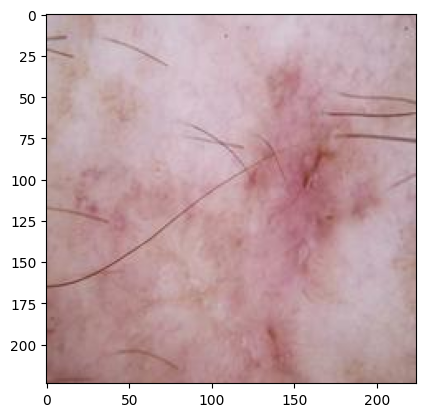

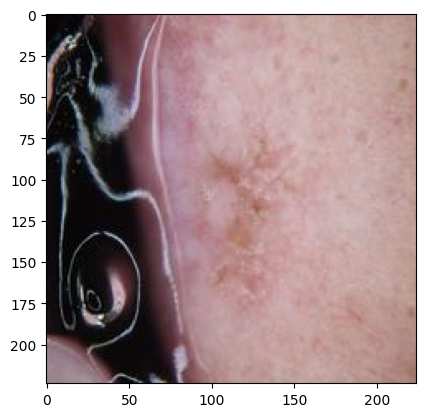

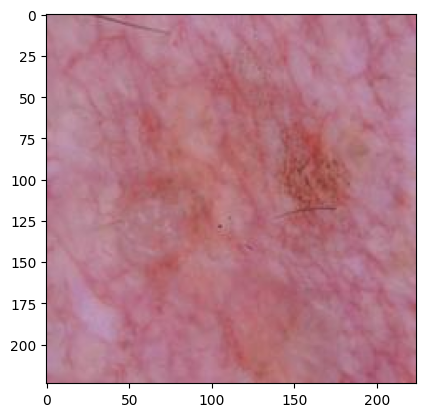

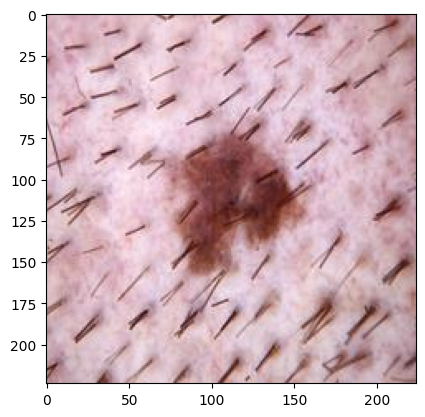

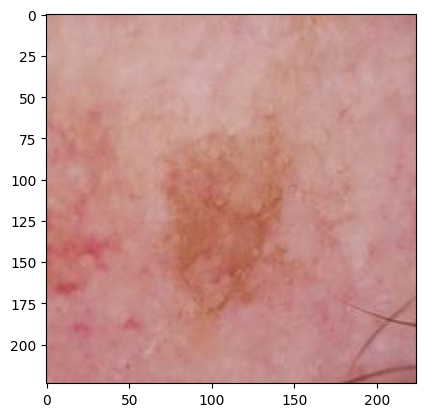

In [ ]:
for i in range (30,36):
  plt.imshow(ds["train"]["image"][i])
  plt.show()

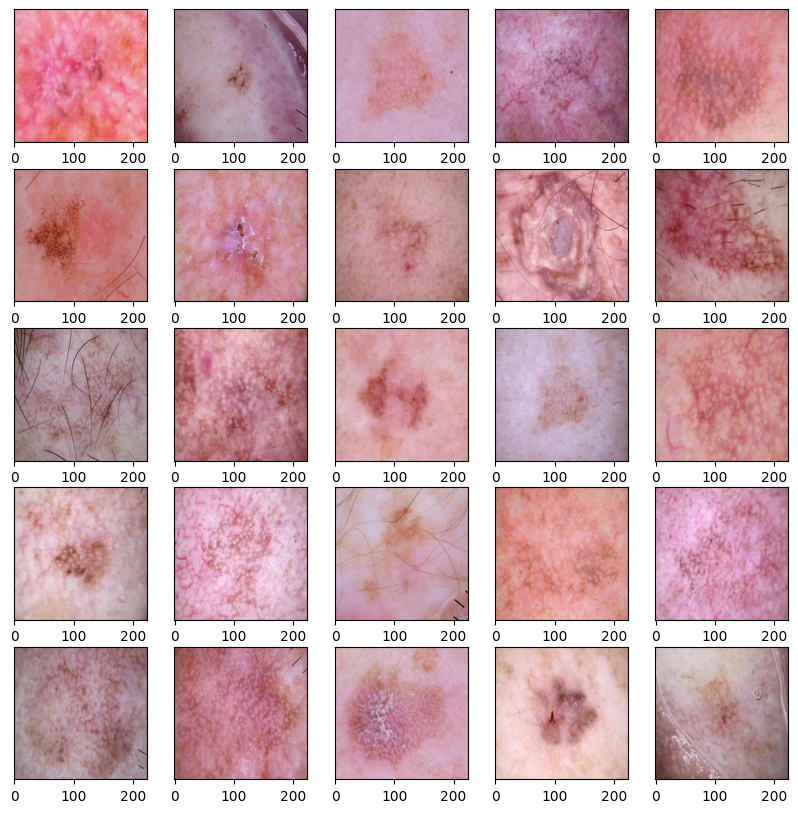

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ds["train"]["image"][i])
plt.show()

In [5]:
ds["train"]

Dataset({
    features: ['image', 'label'],
    num_rows: 11360
})

selecting 2000 rows

In [19]:
import random
train_ds=random.choices(ds["train"], k=7000)
val_ds=random.choices(ds["test"], k=2000)

coverting list into dict.

In [20]:
from datasets import Dataset
train_ds = Dataset.from_list(train_ds)
val_ds = Dataset.from_list(val_ds)
train_ds,val_ds

(Dataset({
     features: ['image', 'label'],
     num_rows: 7000
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 5000
 }))

# data preprocessing

In [21]:
def pre(IMG):
  IMG['image'] = IMG['image'].convert("RGB").resize((224,224))
  return IMG

In [22]:
train_ds = train_ds.map(pre)
val_ds = val_ds.map(pre)

Map:   0%|          | 0/7000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Genrating batchs





In [23]:
train_loader = train_ds.to_tf_dataset(
    columns = ['image'],
    label_cols = ['label'],
    shuffle = True,
    batch_size = 32,
)

In [24]:
val_loader = val_ds.to_tf_dataset(
    columns = ['image'],
    label_cols = ['label'],
    shuffle = True,
    batch_size = 32,
)

Normalizing image

In [25]:
normalization_layer = layers.Rescaling(1./255)
train_loader = train_loader.map(lambda x, y: (normalization_layer(x), y))

val_loader = val_loader.map(lambda x, y: (normalization_layer(x), y))

# defing model

In [26]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(8))

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,177,736 (42.64 MB)

 Trainable params: 11,177,736 (42.64 MB)

 Non-trainable params: 0 (0.00 B)

# compling model

In [28]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

# model traing

In [30]:
with tf.device('/CPU:0'):
    history= model.fit(train_load er,validation_data=val_loader,epochs=10)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 940s 4s/step - accuracy: 0.2022 - loss: 2.0255 - val_accuracy: 0.3424 - val_loss: 1.7293
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 967s 4s/step - accuracy: 0.3615 - loss: 1.6607 - val_accuracy: 0.3926 - val_loss: 1.5528
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 950s 4s/step - accuracy: 0.4143 - loss: 1.4973 - val_accuracy: 0.3900 - val_loss: 1.5804
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 952s 4s/step - accuracy: 0.4855 - loss: 1.3512 - val_accuracy: 0.4240 - val_loss: 1.5324
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 955s 4s/step - accuracy: 0.5542 - loss: 1.1888 - val_accuracy: 0.4048 - val_loss: 1.6662
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 949s 4s/step - accuracy: 0.6142 - loss: 1.0532 - val_accuracy: 0.4188 - val_loss: 1.6823
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 950s 4s/step - accuracy: 0.7117 - loss: 0.8227 - val_accuracy: 0.4466 - val_loss: 1.7987
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 951s 4s/step - accuracy: 0.7837 - loss: 0.6139 - val_accu

ploting accuracy vs val_accuracy

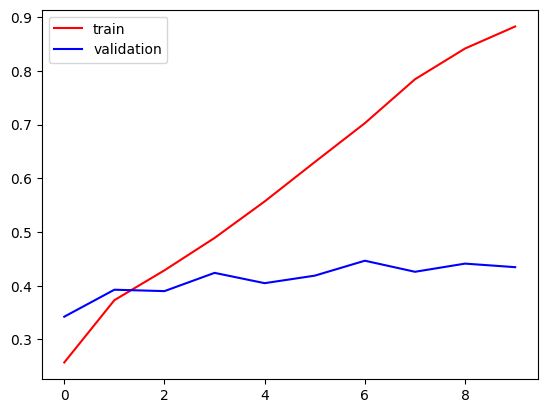

In [31]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

ploting loss vs val_loss

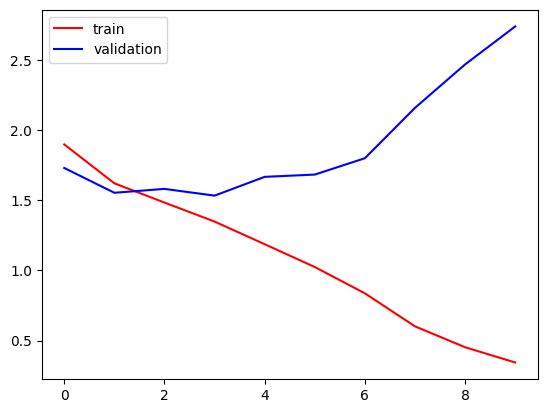

In [32]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()